<a href="https://colab.research.google.com/github/sauravrox/sentiment-analysis/blob/main/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

In [1]:
import pandas as pd 
import tkinter as tk
from tkinter import simpledialog
import tweepy
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn import model_selection
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
from sklearn import svm
import numpy as np
import nltk
from nltk.corpus import stopwords 
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer 
!pip install emoji
import emoji
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
import pickle
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from imblearn.over_sampling import SMOTE
import matplotlib
# print(sklearn.__version__)
matplotlib.use('Agg')

nltk.download('stopwords')
nltk.download('wordnet')

     |████████████████████████████████| 133kB 5.1MB/s 


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

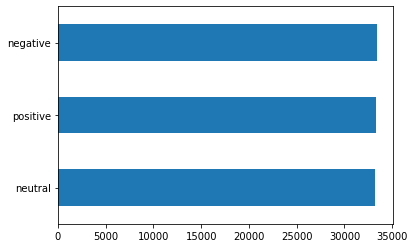

In [ ]:
# Local directory
Reviewdata = pd.read_csv('/content/gdrive/MyDrive/thesis/train.csv', encoding='latin-1')
Reviewdata = Reviewdata.dropna()
count = Reviewdata.isnull().sum().sort_values(ascending=False)
percentage = ((Reviewdata.isnull().sum()/len(Reviewdata)*100)).sort_values(ascending=False)
missing_data = pd.concat([count, percentage], axis=1,
keys=['Count','Percentage'])
# print(Reviewdata['sentiment'].value_counts())
Reviewdata['sentiment'].value_counts().sort_values().plot(kind = 'barh')
plt.show() 

In [ ]:
# Apply first level cleaning
import re
import string

#This function converts to lower-case, removes square bracket, removes numbers and punctuation
def text_clean(text):
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

cleaned = lambda x: text_clean(x)
Reviewdata['cleaned_description'] = pd.DataFrame(Reviewdata.selected_text.apply(cleaned))
Reviewdata.head(10)

,selected_text,sentiment,cleaned_description
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",negative,switchfoot Awww thats a bummer You shoulda ...
1,is upset that he can't update his Facebook by ...,negative,is upset that he cant update his Facebook by t...
2,@Kenichan I dived many times for the ball. Man...,negative,Kenichan I dived many times for the ball Manag...
3,my whole body feels itchy and like its on fire,negative,my whole body feels itchy and like its on fire
4,"@nationwideclass no, it's not behaving at all....",negative,nationwideclass no its not behaving at all im ...
5,@Kwesidei not the whole crew,negative,Kwesidei not the whole crew
6,Need a hug,negative,Need a hug
7,@LOLTrish hey long time no see! Yes.. Rains a...,negative,LOLTrish hey long time no see Yes Rains a bit...
8,@Tatiana_K nope they didn't have it,negative,TatianaK nope they didnt have it
9,@twittera que me muera ?,negative,twittera que me muera


In [ ]:
def extract_emojis(s):
	tweet = emoji.demojize(s)
	tweet = tweet.replace(":"," ")
	tweet = ' '.join(tweet.split())
	return tweet

# Let's take a look at the updated text
Reviewdata['cleaned_description_new'] = pd.DataFrame(Reviewdata['cleaned_description'].apply(cleaned))
Reviewdata['sentiment'] = LabelEncoder().fit_transform(Reviewdata['sentiment'])
# Reviewdata['sentiment'].plot(kind="bar")

In [ ]:
Reviewdata['sentiment'] = LabelEncoder().fit_transform(Reviewdata['sentiment'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

Independent_var = Reviewdata.cleaned_description_new
Dependent_var = Reviewdata.sentiment

IV_train, IV_test, DV_train, DV_test = train_test_split(Independent_var, Dependent_var, test_size = 0.25, random_state = 225)
from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer()
#Create a svm Classifier
clf_svm = svm.SVC(kernel='linear') # Linear Kernel
svm_model = Pipeline([('vectorizer',tvec),('classifier',clf_svm)])

#Train the model using the training sets
svm_model.fit(IV_train, DV_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classifier',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shap

In [ ]:
lin_pred = svm_model.predict(IV_test)
lin_accuracy = accuracy_score(lin_pred,DV_test)
lin_f1 = f1_score(lin_pred,DV_test, average='weighted')
print('Accuracy (linnomial Kernel): ', "%.2f" % (lin_accuracy*100))
print('F1 (linnomial Kernel): ', "%.2f" % (lin_f1*100))

Accuracy (linnomial Kernel):  68.00
F1 (linnomial Kernel):  68.09


In [ ]:
le = LabelEncoder()
# df.region = le.fit_transform(df.region)

rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1)
rbf_svm_model = Pipeline([('vectorizer',tvec),('classifier',rbf)])

#Train the model using the training sets
rbf_svm_model.fit(IV_train, DV_train) 


Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classifier',
                 SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shap

In [ ]:
rbf_svm_model_pred = rbf_svm_model.predict(IV_test)
# rbf_pred = rbf.predict(IV_test)

rbf_svm_model_accuracy = accuracy_score(rbf_svm_model_pred,DV_test)
rbf_svm_model_f1 = f1_score(rbf_svm_model_pred,DV_test, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_svm_model_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_svm_model_f1*100))
# In the same way, the accuracy and f1 scores for SVM with RBF kernel:

Accuracy (RBF Kernel):  62.58
F1 (RBF Kernel):  63.79


In [ ]:
# filename = 'svm_model.sav'
# pickle.dump(svm_model, open(filename, 'wb'))
print("SVM Confusion Matrix: ", confusion_matrix(rbf_svm_model_pred, DV_test))

SVM Confusion Matrix:  [[6293 2535 2000]
 [  68 3090   64]
 [1979 2704 6255]]


In [ ]:
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo')
poly_svm_model = Pipeline([('vectorizer',tvec),('classifier',poly)])

# #Train the model using the training sets
# poly_svm_model.fit(IV_train, DV_train)
poly = poly_svm_model.fit(IV_train, DV_train)

In [ ]:
poly_pred = poly.predict(IV_test)
# rbf_pred = rbf.predict(IV_test)

poly_accuracy = accuracy_score(poly_pred,DV_test)
poly_f1 = f1_score(poly_pred,DV_test, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))
# In the same way, the accuracy and f1 scores for SVM with RBF kernel:

Accuracy (Polynomial Kernel):  74.83
F1 (Polynomial Kernel):  74.57


In [ ]:
print("SVM Confusion Matrix: ", confusion_matrix(poly_pred, DV_test))

SVM Confusion Matrix:  [[6219  933 1510]
 [ 308 6057  386]
 [1813 1339 6423]]


In [ ]:
print("SVM Report : ", 
classification_report(poly_pred, DV_test))

SVM Report :                precision    recall  f1-score   support

           0       0.75      0.72      0.73      8662
           1       0.73      0.90      0.80      6751
           2       0.77      0.67      0.72      9575

    accuracy                           0.75     24988
   macro avg       0.75      0.76      0.75     24988
weighted avg       0.75      0.75      0.75     24988



In [ ]:
consumerKey = 'Y76b838VJixCT9coY5aVaFWRv'
consumerSecret = 'MWQiIs4rzY8zKySusGf6hPiLU8e3vAbJNV02lKi3FLhdfirUmT'
accessToken = '1266387212150566913-HS7RCIKe86EsZFmMVMjeOF3SWlvCY5'
accessTokenSecret = 'AnngLumAWhaKXw1avMXR8eWu1GUllVMrML1zQKy1poLBP'

# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret) 
    
# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret) 
    
# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

# Extract 100 tweets from the twitter user
# ROOT = tk.Tk()

# ROOT.withdraw()
# the input dialog
# USER_INP = simpledialog.askstring(title="Fetch Tweets", prompt="Write your Twitter Handle.")
# posts = api.user_timeline(screen_name=USER_INP, count = 100, lang ="en", tweet_mode="extended")
user_data = '%23'+'biden'
###########################################################################
# Create a dataframe with a column called Tweets
# :
# Cache the stop words for speed 
cachedStopWords = stopwords.words("english")
posts = list()
for tweet in tweepy.Cursor(api.search, q=user_data, lang='en').items(500):
	posts.append(tweet.text)


In [ ]:
lemmatiser = WordNetLemmatizer()
list_posts = list()
for p in posts:
	temp = re.sub(' +', ' ', p).lower()
	temp = " ".join([lemmatiser.lemmatize(w) for w in temp.split(' ') if w not in cachedStopWords])
	temp = extract_emojis(temp)
	temp = text_clean(temp)
	list_posts.append(temp)
# print(list_posts)
df = pd.DataFrame([list_post for list_post in list_posts], columns=['Tweets'])

# Show the first 5 rows of data
df.head()

# Clean the tweets
df['Tweets'] = df['Tweets'].apply(text_clean)

In [ ]:
#Predict the response for test dataset
# Create a function to get the polarity
def svm_getPolarity(text):
	example = [text]
	result = poly.predict(example)
	if result==1:
		result = 'neutral'
	if result==2:
		result = 'positive'
	if result==0:
		result = 'negative'
	return result

# y_pred = clf_svm.predict(IV_test)

df['SVM_Polarity'] = df['Tweets'].apply(svm_getPolarity)

In [ ]:
df

,Tweets,SVM_Polarity
0,bidens plan narrow racial wealth gap https ax...,positive
1,rt marionmckeone “my fellow americans riot mas...,positive
2,rt people stop wasting lot time trying improv...,positive
3,rt UnitedStates an emotional joe biden marked...,positive
4,billionaire businesswoman u ex president donal...,positive
...,...,...
495,rt arunpudur trump said biden fuel price skyro...,positive
496,disaster declaration issued texas abbott secur...,positive
497,pray write stupid stuff online trump biden usa...,positive
498,rt peaceupatl personfacepalmingmediumskintone ...,positive
